In [1]:
from API import TradingAPI
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# auxiliary functions
def plot_candlestick(times, open_prices, high_prices, low_prices, close_prices):
    """
    Candlestick barplot (refer to https://plotly.com/python/candlestick-charts/ for documentation).
    """
    fig = go.Figure(data=[go.Candlestick(
        x=times,
        open=open_prices,
        high=high_prices,
        low=low_prices,
        close=close_prices)])

    fig.show()

In [2]:
api = TradingAPI.TradingAPI()

# test retrieval of daily prices
times_daily, open_prices, high_prices, low_prices, close_prices, adjusted_close_prices, volumes, dividend_amounts, split_coefficients = api.getTimeSeriesDailyAdjusted(symbol='AAPL')

# retrieving short and long period SMAs
times_short_smas, short_smas = api.getSMA(symbol='AAPL', interval='15min', time_period=60, series_type='close')
times_long_smas, long_smas = api.getSMA(symbol='AAPL', interval='15min', time_period=200, series_type='close')
times_bbands, real_middle_bands, real_upper_bands, real_lower_bands = api.getBBANDS(symbol='AAPL', interval='15min', time_period=60, series_type='close')

# retrieving RSI values
times_rsi, rsis = api.getRSI(symbol='AAPL', interval='15min', time_period=60, series_type='close')

Retrieving adjusted daily time series.
Request: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=ZY4Y0XKCPYTO1EQG.
Data retrieved.
Retrieving SMA.
Request: https://www.alphavantage.co/query?function=SMA&symbol=AAPL&interval=15min&time_period=60&series_type=close&apikey=ZY4Y0XKCPYTO1EQG.
Data retrieved.
Retrieving SMA.
Request: https://www.alphavantage.co/query?function=SMA&symbol=AAPL&interval=15min&time_period=200&series_type=close&apikey=ZY4Y0XKCPYTO1EQG.
Data retrieved.
Retrieving Bollinger bands.
Request: https://www.alphavantage.co/query?function=BBANDS&symbol=AAPL&interval=15min&time_period=60&series_type=close&apikey=ZY4Y0XKCPYTO1EQG.
Data retrieved.
Retrieving RSI values.
Request: https://www.alphavantage.co/query?function=RSI&symbol=AAPL&interval=15min&time_period=60&series_type=close&apikey=ZY4Y0XKCPYTO1EQG.
Data retrieved.


In [3]:
plot_candlestick(times_daily, open_prices, high_prices, low_prices, adjusted_close_prices)

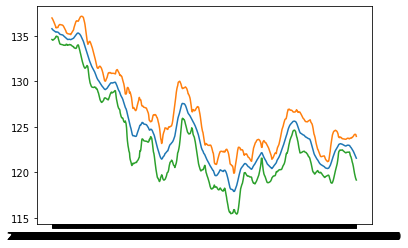

In [4]:
plt.plot(times_bbands, real_middle_bands)
plt.plot(times_bbands, real_upper_bands)
plt.plot(times_bbands, real_lower_bands)
plt.show()